**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
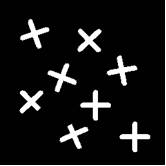
art8lab1.png: 
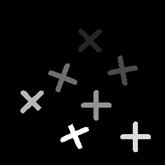
art8lab2.png: 
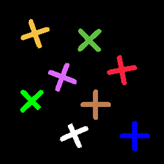
		

Using N_8.
defaultdict(None, {2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1, 8.0: 1, 11.0: 1, 14.0: 1, 15.0: 1, 16.0: 1, 17.0: 1, 18.0: 1, 1.0: 1, 19.0: 2, 20.0: 2, 9.0: 2, 10.0: 2, 12.0: 2, 13.0: 2, 7.0: 2, 34.0: 3, 36.0: 3, 22.0: 3, 26.0: 3, 27.0: 3, 28.0: 3, 29.0: 3, 30.0: 3, 31.0: 3, 21.0: 3, 32.0: 4, 33.0: 4, 35.0: 4, 24.0: 4, 25.0: 4, 23.0: 4, 40.0: 5, 44.0: 5, 45.0: 5, 37.0: 5, 39.0: 6, 41.0: 6, 42.0: 6, 43.0: 6, 38.0: 6, 63.0: 7, 61.0: 7, 47.0: 7, 46.0: 7, 64.0: 8, 65.0: 8, 66.0: 8, 67.0: 8, 49.0: 8, 50.0: 8, 51.0: 8, 52.0: 8, 53.0: 8, 54.0: 8, 55.0: 8, 56.0: 8, 57.0: 8, 58.0: 8, 59.0: 8, 60.0: 8, 62.0: 8, 48.0: 8})


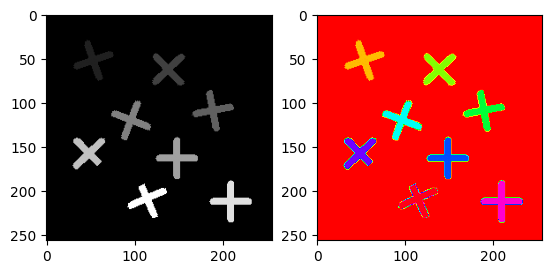

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from copy import deepcopy

def component_labeling(img):
    lines, columns = img.shape
    
    print("Using N_8.")
    
    modifiers = [(-1,-1),(-1,0),(-1,1),(0,-1)] # The index of the neighborhood pixels that should be verified.
    
    labels = np.zeros((lines, columns))
    equivalences = defaultdict(set)
    
    next_label = 1
    for i in range(lines):
        for j in range(columns):
            if img[i][j] == 1: # Black (ignore).
                continue 
            
            for (modifier_i, modifier_j) in modifiers:
                try:
                    neighbor_label = labels[i + modifier_i][j + modifier_j]
                    if neighbor_label != 0: # Labelled neighbor
                        if labels[i][j] == 0:
                            labels[i][j] = neighbor_label # Receives the first label found.
                        elif labels[i][j] == neighbor_label:
                            continue
                        else:
                            smaller = min(labels[i][j], neighbor_label)
                            bigger = max(labels[i][j], neighbor_label)
                                
                            equivalences[smaller].add(bigger)           
                except IndexError:
                    continue
                
            if labels[i][j] == 0: # The pixel hasn't been labelled.
                labels[i][j] = next_label # The next available label is assigned to it.
                next_label += 1

    final_equivalences, num_components = resolve_transitive_equivalences(equivalences)
    for i in range(lines):
        for j in range(columns):
            label = labels[i][j]
            if label != 0:
                labels[i][j] = final_equivalences[label]
                
    return labels, num_components


def resolve_transitive_equivalences(equivalences):
    
    # Solve cases like 1 --> 2, 2 --> 3 (transitive)
    to_be_removed = []
    for key in list(equivalences.keys()):
        stack = list(equivalences[key])
            
        while len(stack) > 0:
            try:
                next = stack.pop(0)
                to_be_removed.append(next)
                next_values = list(equivalences[next])

                for item in next_values:
                    if item == key:
                        continue
                    
                    if item not in equivalences[key]:
                        stack.append(item)
                        equivalences[key].add(item)  
            except ValueError:
                continue
            
    for rem in to_be_removed:
        try:
            del equivalences[rem]
        except KeyError:
            continue
        
    # Solve cases like 1 --> 3, 2 --> 3 (common element)
    to_be_removed = []
    for key1 in list(equivalences.keys()):
        for key2 in list(equivalences.keys()):
            if key1 == key2:
                continue
            
            if equivalences[key1].isdisjoint(equivalences[key2]):
                continue
            
            # There is a common element
            
            smaller = min(key1, key2)
            bigger = max(key1, key2)
            
            equivalences[smaller].update(equivalences[bigger])
            equivalences[smaller].add(bigger)
            
            to_be_removed.append(bigger)
    
    for rem in to_be_removed:
        try:
            del equivalences[rem]
        except KeyError:
            continue        
                            
    final_equivalences = defaultdict()
    
    next_label = 1 # Used to make the labels of the components a sequence starting at 1
    for key, values in equivalences.items():        
        for item in values:
            final_equivalences[item] = next_label
        
        final_equivalences[key] = next_label
            
        next_label += 1
            
    print(final_equivalences)
            
    return final_equivalences, (next_label - 1)


if __name__ == "__main__":
    img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

    labelled_img, num_components = component_labeling(img)
    
    plt.subplot(1,2,1)
    plt.imshow(labelled_img, cmap='gray', vmin=0, vmax=num_components)
    
    plt.subplot(1,2,2)
    plt.imshow(labelled_img, cmap='hsv', vmin=0, vmax=num_components)


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [ ]:
# code here